# Load DataSet

In [1]:
import numpy as np

!wget -O Data.npz https://zenodo.org/record/4269852/files/dermamnist.npz?download=1
data = np.load('Data.npz')
print(data.files)

--2022-01-12 13:12:32--  https://zenodo.org/record/4269852/files/dermamnist.npz?download=1
Resolving zenodo.org (zenodo.org)... 137.138.76.77
Connecting to zenodo.org (zenodo.org)|137.138.76.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19725078 (19M) [application/octet-stream]
Saving to: ‘Data.npz’

Data.npz            100%[===================>]  18.81M  4.64MB/s    in 4.1s    

2022-01-12 13:12:37 (4.60 MB/s) - ‘Data.npz’ saved [19725078/19725078]

['train_images', 'val_images', 'test_images', 'train_labels', 'val_labels', 'test_labels']


# Visualization

In [2]:
import numpy as np

x_train = data['train_images']
y_train = data['train_labels']

x_val = data['val_images']
y_val = data['val_labels']

x_test = data['test_images']
y_test = data['test_labels']

print('Labels: ', np.unique(y_train))
labels_number = len(np.unique(y_train))

print('train_images shape: ', data['train_images'].shape)
print('train_labels shape: ', data['train_labels'].shape)

print('val_images shape: ', data['val_images'].shape)
print('val_labels shape: ', data['val_labels'].shape)

print('test_images shape: ', data['test_images'].shape)
print('test_labels shape: ', data['test_labels'].shape)

Labels:  [0 1 2 3 4 5 6]
train_images shape:  (7007, 28, 28, 3)
train_labels shape:  (7007, 1)
val_images shape:  (1003, 28, 28, 3)
val_labels shape:  (1003, 1)
test_images shape:  (2005, 28, 28, 3)
test_labels shape:  (2005, 1)


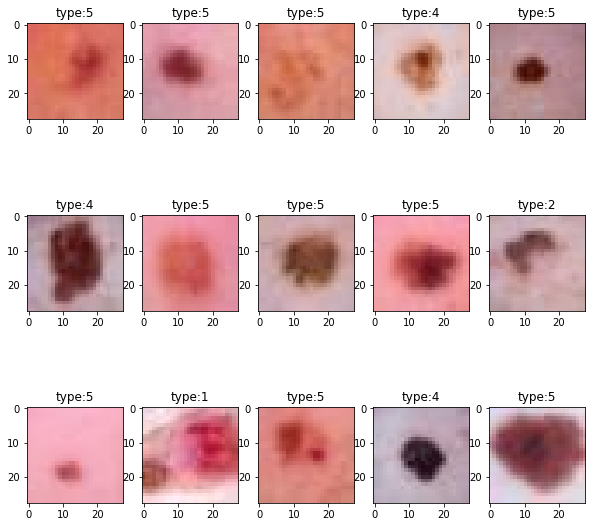

In [3]:
def plot_img(x_train, y_train):
    from matplotlib import pyplot as plt
    fig=plt.figure(figsize=(10, 10))
    columns = 5
    rows = 3
    for i in range(1, columns*rows +1):
        fig.add_subplot(rows, columns, i)
        img = x_train[i]
        plt.imshow(img)
        plt.title('type:'+str(y_train[i][0]))
    plt.show()
plot_img(x_train, y_train)

# Unbalancment of data 

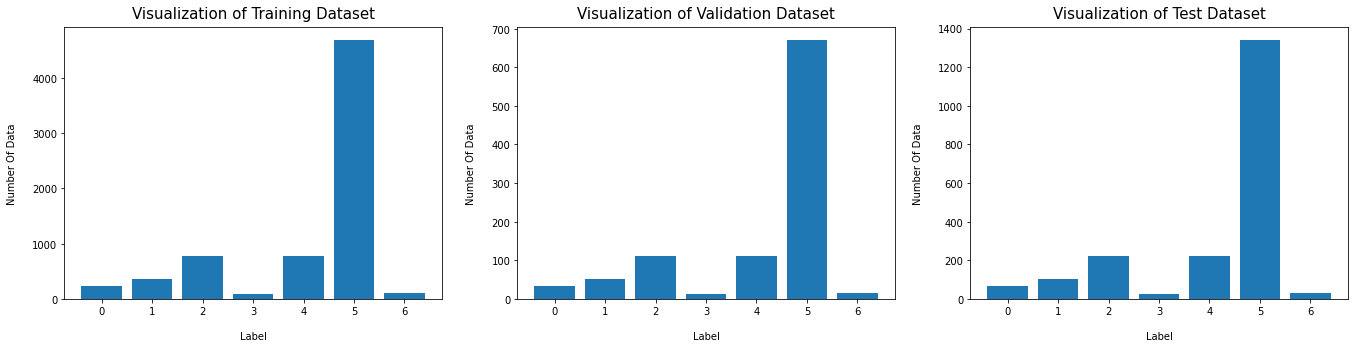

In [4]:
from matplotlib import pyplot as plt

def data_summary(y):
    data = dict()
    for i in range(labels_number):
        data[str(i)] = (int)(np.sum(y==i))
    group_data = list(data.values())
    group_names = list(data.keys())
    return group_data, group_names

def draw_ax(i, group_data, group_names, title):
    ax[i].bar(group_names, group_data)
    ax[i].set_title("Visualization of "+ title , y=1.01, fontsize=15)
    ax[i].set_ylabel("Number Of Data", labelpad=15)
    ax[i].set_xlabel("Label", labelpad=15)

fig, ax = plt.subplots(1, 3, figsize=(23, 5))

group_data, group_names = data_summary(y_train)
draw_ax(0, group_data, group_names, "Training Dataset")

group_data, group_names = data_summary(y_val)
draw_ax(1, group_data, group_names, "Validation Dataset")

group_data, group_names = data_summary(y_test)
draw_ax(2, group_data, group_names, "Test Dataset")

# Preprocess

In [5]:
import tensorflow

x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0

y_train = tensorflow.keras.utils.to_categorical(y_train, labels_number)
y_val = tensorflow.keras.utils.to_categorical(y_val, labels_number)
y_test = tensorflow.keras.utils.to_categorical(y_test, labels_number)
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(7007, 28, 28, 3)
(7007, 7)
(1003, 28, 28, 3)
(1003, 7)


# Model && Training

In [6]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input

input = Input((28,28,3))
conv_1 = Conv2D(16, (3,3), activation='relu')(input)
conv_2 = Conv2D(16, (3,3), activation='relu')(conv_1)
maxpool1 = MaxPooling2D()(conv_2)
conv_3 = Conv2D(32, (3,3), activation='relu')(maxpool1)
maxpool2 = MaxPooling2D()(conv_3)
conv_4 = Conv2D(32, (3,3), activation='relu')(maxpool2)
flatten = Flatten()(conv_4)
dense = Dense(100, activation = 'relu')(flatten)
output = Dense(7, activation='softmax')(dense)

model = tensorflow.keras.Model(inputs=input, outputs=output)

model.compile( optimizer=tensorflow.keras.optimizers.Adam(),
               loss='categorical_crossentropy',
               metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 16)        2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 16)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                         

In [7]:
history = model.fit(
    x_train,
    y_train,
    validation_data=[x_val, y_val],
    epochs=50,
    batch_size=64
)

Epoch 1/50
110/110 [==============================] - 15s 12ms/step - loss: 1.0761 - accuracy: 0.6689 - val_loss: 0.9684 - val_accuracy: 0.6690
Epoch 2/50
110/110 [==============================] - 1s 8ms/step - loss: 0.9514 - accuracy: 0.6696 - val_loss: 0.9262 - val_accuracy: 0.6690
Epoch 3/50
110/110 [==============================] - 1s 8ms/step - loss: 0.9100 - accuracy: 0.6755 - val_loss: 0.9329 - val_accuracy: 0.6710
Epoch 4/50
110/110 [==============================] - 1s 9ms/step - loss: 0.8883 - accuracy: 0.6859 - val_loss: 0.8479 - val_accuracy: 0.6839
Epoch 5/50
110/110 [==============================] - 1s 9ms/step - loss: 0.8563 - accuracy: 0.6920 - val_loss: 0.8422 - val_accuracy: 0.6969
Epoch 6/50
110/110 [==============================] - 1s 9ms/step - loss: 0.8422 - accuracy: 0.7003 - val_loss: 0.8102 - val_accuracy: 0.6999
Epoch 7/50
110/110 [==============================] - 1s 9ms/step - loss: 0.8211 - accuracy: 0.6990 - val_loss: 0.8364 - val_accuracy: 0.6869
Epoc

# Evaluate model

In [8]:
train_loss, train_acc = model.evaluate(x_train, y_train)
print('train loss = {:.2f} , train accuracy = {:.2f}%'.format(train_loss, train_acc*100))

val_loss, val_acc = model.evaluate(x_val, y_val)
print('validation loss = {:.2f} , validation accuracy = {:.2f}%'.format(val_loss, val_acc*100))

test_loss, test_acc = model.evaluate(x_test, y_test)
print('test loss = {:.2f} , test accuracy = {:.2f}%'.format(test_loss, test_acc*100))

219/219 [==============================] - 1s 4ms/step - loss: 0.2713 - accuracy: 0.9004
train loss = 0.27 , train accuracy = 90.04%
32/32 [==============================] - 0s 6ms/step - loss: 1.0654 - accuracy: 0.6800
validation loss = 1.07 , validation accuracy = 68.00%
63/63 [==============================] - 0s 5ms/step - loss: 1.0648 - accuracy: 0.7067
test loss = 1.06 , test accuracy = 70.67%


# Recall, Precesion, F1-score

In [9]:
from sklearn.metrics import classification_report

def calculate_metrics(x, y, model):
  y_pred = model.predict(x)
  y = np.argmax(y, axis=1)
  y_pred = np.argmax(y_pred, axis=1)
  target_names=['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6']
  cr = classification_report(
      y,
      y_pred,
      target_names = target_names
  )
  print('Classification Report')
  print(cr)

In [10]:
calculate_metrics(x_train, y_train, model)

Classification Report
              precision    recall  f1-score   support

     class 0       0.78      0.90      0.83       228
     class 1       0.80      0.87      0.84       359
     class 2       0.87      0.71      0.78       769
     class 3       0.85      0.66      0.75        80
     class 4       0.82      0.75      0.78       779
     class 5       0.93      0.96      0.95      4693
     class 6       0.97      0.93      0.95        99

    accuracy                           0.90      7007
   macro avg       0.86      0.83      0.84      7007
weighted avg       0.90      0.90      0.90      7007



In [11]:
calculate_metrics(x_val, y_val, model)

Classification Report
              precision    recall  f1-score   support

     class 0       0.19      0.30      0.24        33
     class 1       0.41      0.50      0.45        52
     class 2       0.41      0.32      0.36       110
     class 3       0.20      0.08      0.12        12
     class 4       0.35      0.37      0.36       111
     class 5       0.84      0.84      0.84       671
     class 6       0.64      0.50      0.56        14

    accuracy                           0.68      1003
   macro avg       0.43      0.42      0.42      1003
weighted avg       0.68      0.68      0.68      1003



In [12]:
calculate_metrics(x_test, y_test, model)

Classification Report
              precision    recall  f1-score   support

     class 0       0.29      0.44      0.35        66
     class 1       0.36      0.38      0.37       103
     class 2       0.48      0.35      0.40       220
     class 3       0.00      0.00      0.00        23
     class 4       0.37      0.39      0.38       223
     class 5       0.85      0.87      0.86      1341
     class 6       0.81      0.59      0.68        29

    accuracy                           0.71      2005
   macro avg       0.45      0.43      0.43      2005
weighted avg       0.70      0.71      0.70      2005



# plot AUC

In [17]:
from itertools import cycle
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve, average_precision_score

def AUC(x, y, model):
    target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6']
    y_pred = model.predict(x)

    precision = dict()
    recall = dict()
    average_precision = dict()
    for i in range(7):
        precision[i], recall[i], _ = precision_recall_curve(y[:, i], y_pred[:, i])
        average_precision[i] = average_precision_score(y[:, i], y_pred[:, i])

    precision["micro"], recall["micro"], _ = precision_recall_curve(
        y.ravel(), y_pred.ravel()
    )
    average_precision["micro"] = average_precision_score(y, y_pred, average="micro")

    colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue", "teal", "red", "blue"])
    _, ax = plt.subplots(figsize=(10, 8))

    for i, color in zip(range(7), colors):
        display = PrecisionRecallDisplay(
            recall=recall[i],
            precision=precision[i],
            average_precision=average_precision[i],
        )
        display.plot(ax=ax, name=f'AUC for class {i}', color=color)

    display.plot(ax=ax, name="Micro-average precision-recall", color="gold")
    
    plt.show()

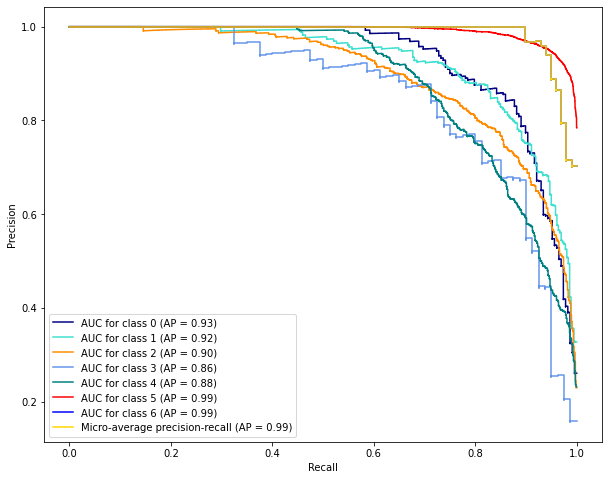

In [18]:
AUC(x_train, y_train, model)

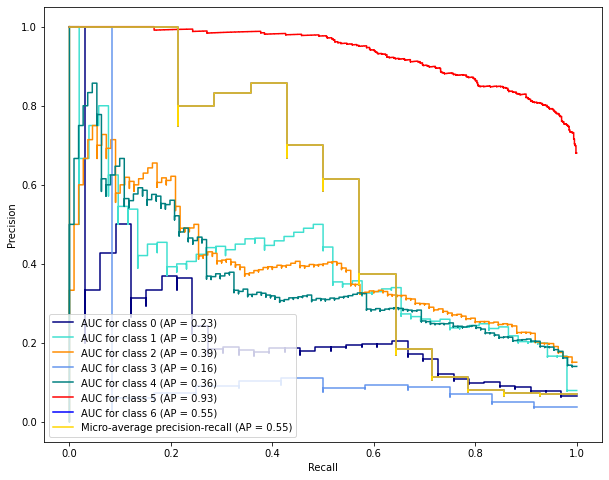

In [19]:
AUC(x_val, y_val, model)

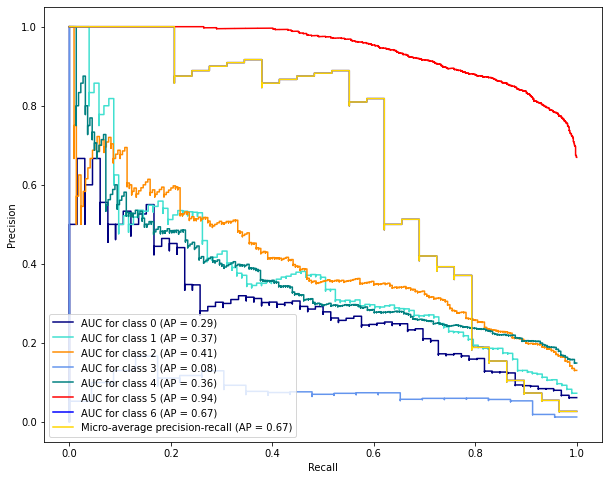

In [20]:
AUC(x_test, y_test, model)

# Confusion Matrix

In [21]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(x, y, model):
  y_pred = model.predict(x)
  y = np.argmax(y, axis=1)
  y_pred = np.argmax(y_pred, axis=1)
  target_names=['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6']
  cm = confusion_matrix(y, y_pred)
  print(f'Confusion Matrix')
  print(cm)
  plt.figure(figsize=(10,10))
  plt.imshow(cm)
  plt.colorbar()
  tick_mark = np.arange(7)
  _ = plt.xticks(tick_mark, target_names, rotation=90)
  _ = plt.yticks(tick_mark, target_names)
  plt.show()

Confusion Matrix
[[ 205    9    2    0    2   10    0]
 [  14  312    6    2    6   19    0]
 [  23   26  548    2   37  133    0]
 [  11    4    4   53    1    7    0]
 [   4    9   19    0  584  163    0]
 [   7   26   54    5   83 4515    3]
 [   0    2    0    0    2    3   92]]


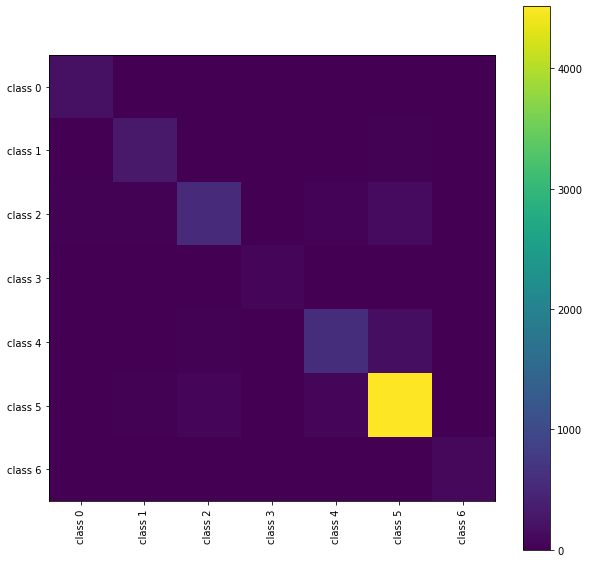

In [22]:
plot_confusion_matrix(x_train, y_train, model)

Confusion Matrix
[[ 10   8   7   0   4   4   0]
 [ 12  26   6   0   2   6   0]
 [ 13  10  35   0  14  38   0]
 [  6   4   0   1   0   1   0]
 [  2   3   8   1  41  54   2]
 [  7  13  30   2  55 562   2]
 [  2   0   0   1   1   3   7]]


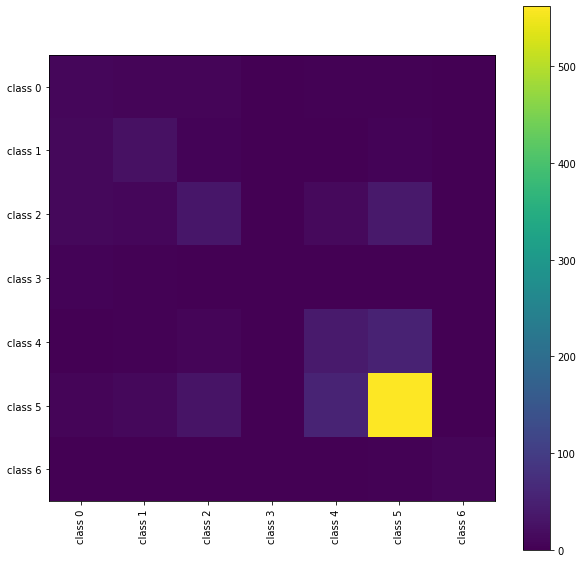

In [23]:
plot_confusion_matrix(x_val, y_val, model)

Confusion Matrix
[[  29   15    6    2    7    7    0]
 [  26   39   15    1   10   12    0]
 [   9   22   77    1   32   79    0]
 [   7    5    3    0    2    6    0]
 [   9    6   22    1   87   96    2]
 [  18   20   37    1   95 1168    2]
 [   1    2    1    0    4    4   17]]


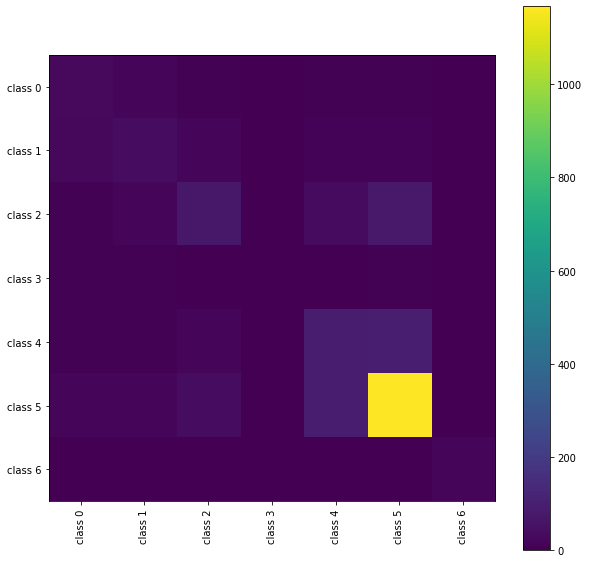

In [24]:
plot_confusion_matrix(x_test, y_test, model)

# Extra part